In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pylab as plt
from collections import defaultdict

In [218]:
def scatter(x, y, path_figsave=None):
    pearsonr = '{0:8.3g}'.format(st.pearsonr(x, y)[0])
    pearsonp = '{0:8.3g}'.format(st.pearsonr(x, y)[1])
    spearmanr = '{0:8.3g}'.format(st.spearmanr(x, y)[0])
    spearmanp = '{0:8.3g}'.format(st.spearmanr(x, y)[1])

    title = "pearson r: {}, p: {}\n spearman r: {}, p: {}".format(pearsonr, pearsonp, spearmanr, spearmanp)

    a, b = np.polyfit(x, y, 1)
    y2 = a * x + b
    plt.plot(x, y2, color='gray')

    plt.scatter(x, y)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title(title)

    if path_figsave is not None:
        plt.savefig(path_figsave)

    plt.show()

In [6]:
nm_all = pd.read_csv("../data_input/nm.all_tp.tsv", sep="\t", index_col=0)
me_all = pd.read_csv("../data_input/me.all_tp.tsv", sep="\t", index_col=0)

## 各個人ごとの折れ線グラフ

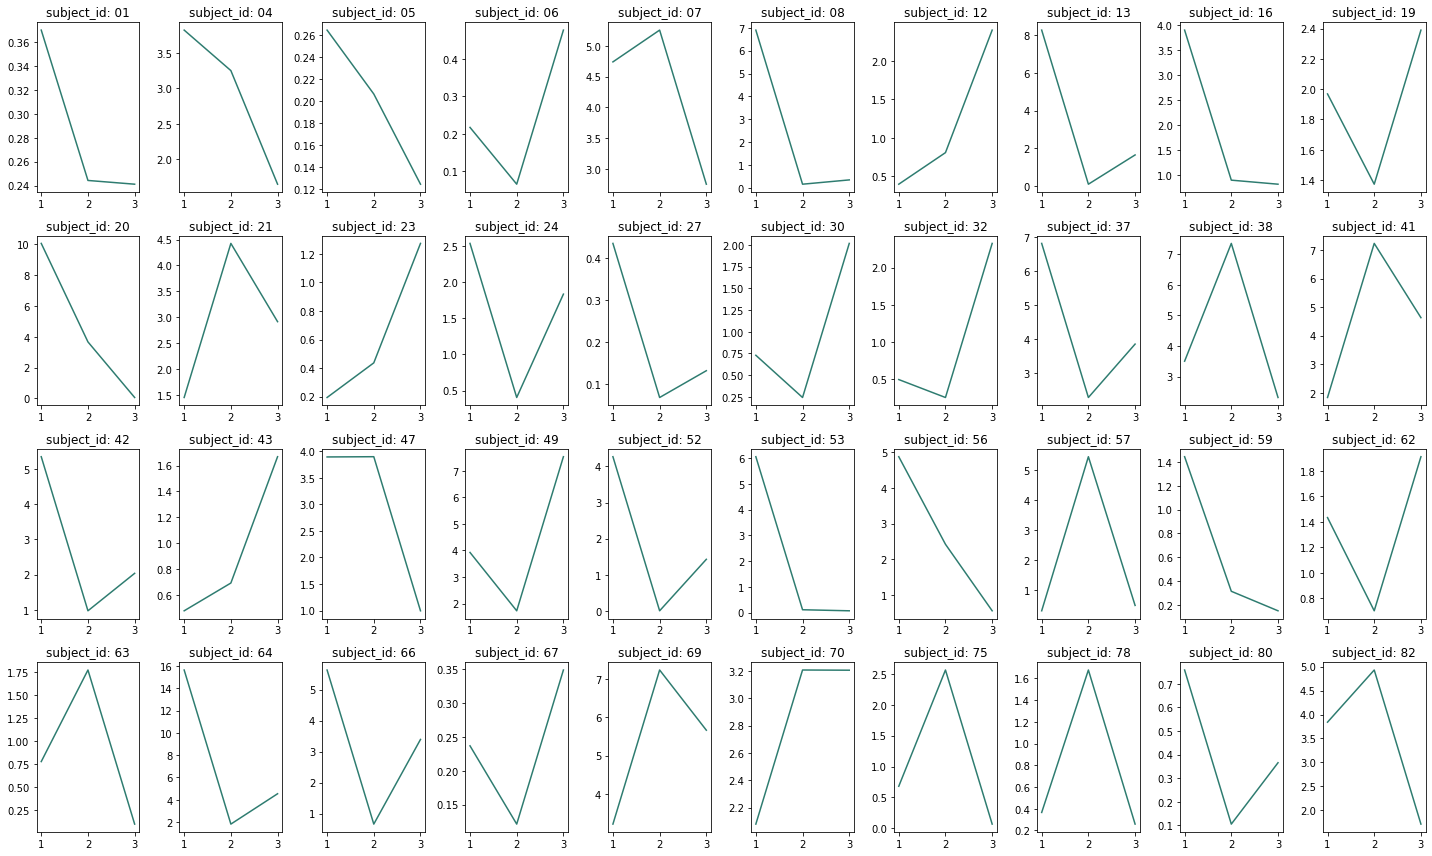

In [22]:
w=20
h=12
plt.figure(figsize=(w, h))
subject_ids_c = sorted(set(me_all.T.query("group == 'C'")["subject_id"]))
for i, subject_id in enumerate(subject_ids_c, start=1):
    plt.subplot(4, 10, i)
    sample_ids = me_all.T.query("subject_id == @subject_id").index
    plt.plot([1, 2, 3], nm_all.loc["IgA", sample_ids], color="#2e7c70")
    plt.title(f"subject_id: {subject_id}")
    plt.tight_layout()

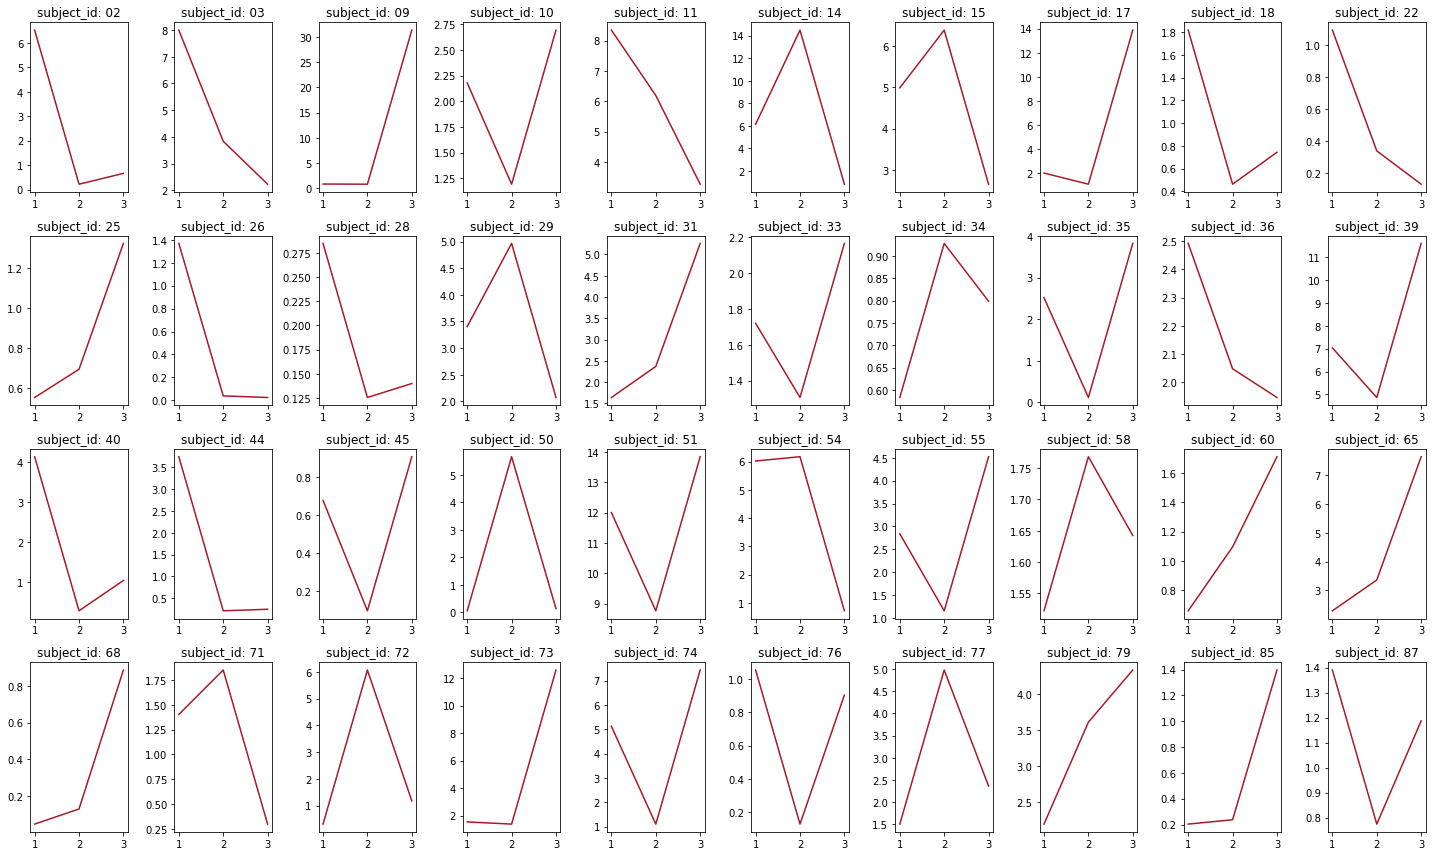

In [24]:
w=20
h=12
plt.figure(figsize=(w, h))
subject_ids_t = sorted(set(me_all.T.query("group == 'T'")["subject_id"]))
for i, subject_id in enumerate(subject_ids_t, start=1):
    plt.subplot(4, 10, i)
    sample_ids = me_all.T.query("subject_id == @subject_id").index
    plt.plot([1, 2, 3], nm_all.loc["IgA", sample_ids], color="#a91826")
    plt.title(f"subject_id: {subject_id}")
    plt.tight_layout()

## レスポンダー（上位25 vs 下位25）

In [25]:
ge_diff = pd.read_csv("../data_input/ge.0.001.diff.tsv", sep="\t", index_col=0)
ra_diff = pd.read_csv("../data_input/ra.25.diff.tsv", sep="\t", index_col=0)
nm_diff = pd.read_csv("../data_input/nm.diff.tsv", sep="\t", index_col=0)
me_diff = pd.read_csv("../data_input/me.diff.tsv", sep="\t", index_col=0)

In [78]:
ge = pd.read_csv("../data_input/genus.0.001.tsv", sep="\t", index_col=0)
ra = pd.read_csv("../data_input/ra.25.tsv", sep="\t", index_col=0)
nm = pd.read_csv("../data_input/nm.tsv", sep="\t", index_col=0)

In [79]:
sample_ids_c_head10 = nm_diff.loc["IgA", me_diff.T.query("group == 'C'").index].sort_values(ascending=False).head(10).keys()
sample_ids_c_tail10 = nm_diff.loc["IgA", me_diff.T.query("group == 'C'").index].sort_values(ascending=False).tail(10).keys()
sample_ids_t_head10 = nm_diff.loc["IgA", me_diff.T.query("group == 'T'").index].sort_values(ascending=False).head(10).keys()
sample_ids_t_tail10 = nm_diff.loc["IgA", me_diff.T.query("group == 'T'").index].sort_values(ascending=False).tail(10).keys()

In [80]:
sample_ids_c_head10_0w = []
for sample_id in sample_ids_c_head10:
    subject_id = sample_id.split("_")[0]
    sample_ids_c_head10_0w.append(f"C_{subject_id}_0w")

sample_ids_c_tail10_0w = []
for sample_id in sample_ids_c_tail10:
    subject_id = sample_id.split("_")[0]
    sample_ids_c_tail10_0w.append(f"C_{subject_id}_0w")
    
sample_ids_t_head10_0w = []
for sample_id in sample_ids_t_head10:
    subject_id = sample_id.split("_")[0]
    sample_ids_t_head10_0w.append(f"T_{subject_id}_0w")

sample_ids_t_tail10_0w = []
for sample_id in sample_ids_t_tail10:
    subject_id = sample_id.split("_")[0]
    sample_ids_t_tail10_0w.append(f"T_{subject_id}_0w")

In [81]:
def safe_mannwhitney(vals_ctrl, vals_test):
    try:
        return st.mannwhitneyu(vals_ctrl, vals_test, alternative="two-sided").pvalue
    except:
        return 1

In [83]:
# for ind in ge_diff.index:
dd = defaultdict(lambda: defaultdict(float))
for ind in ge_diff.index:
    vals_ctrl = ge_diff.loc[ind, sample_ids_c_tail10]
    vals_test = ge_diff.loc[ind, sample_ids_c_head10]
    dd["C_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)
    
    vals_ctrl = ge_diff.loc[ind, sample_ids_t_tail10]
    vals_test = ge_diff.loc[ind, sample_ids_t_head10]
    dd["T_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)
    
    vals_ctrl = ge.loc[ind, sample_ids_c_tail10_0w]
    vals_test = ge.loc[ind, sample_ids_c_head10_0w]
    dd["C_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)
    
    vals_ctrl = ge.loc[ind, sample_ids_t_tail10_0w]
    vals_test = ge.loc[ind, sample_ids_t_head10_0w]
    dd["T_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

for ind in ra_diff.index:
    vals_ctrl = ra_diff.loc[ind, sample_ids_c_tail10]
    vals_test = ra_diff.loc[ind, sample_ids_c_head10]
    dd["C_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = ra_diff.loc[ind, sample_ids_t_tail10]
    vals_test = ra_diff.loc[ind, sample_ids_t_head10]
    dd["T_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = ra.loc[ind, sample_ids_c_tail10_0w]
    vals_test = ra.loc[ind, sample_ids_c_head10_0w]
    dd["C_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = ra.loc[ind, sample_ids_t_tail10_0w]
    vals_test = ra.loc[ind, sample_ids_t_head10_0w]
    dd["T_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

for ind in nm_diff.index:
    vals_ctrl = nm_diff.loc[ind, sample_ids_c_tail10]
    vals_test = nm_diff.loc[ind, sample_ids_c_head10]
    dd["C_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = nm_diff.loc[ind, sample_ids_t_tail10]
    vals_test = nm_diff.loc[ind, sample_ids_t_head10]
    dd["T_eff"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = nm.loc[ind, sample_ids_c_tail10_0w]
    vals_test = nm.loc[ind, sample_ids_c_head10_0w]
    dd["C_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

    vals_ctrl = nm.loc[ind, sample_ids_t_tail10_0w]
    vals_test = nm.loc[ind, sample_ids_t_head10_0w]
    dd["T_base"][ind] = safe_mannwhitney(vals_ctrl, vals_test)

In [154]:
df_responder_htest = pd.DataFrame(dd)
df_responder_htest.to_excel("./Responder.Top25%_vs_Bottom25%.xlsx")

In [155]:
df_responder_base = pd.read_excel("table.responder2.base.xlsx", engine="openpyxl", index_col=0)
df_responder_eff = pd.read_excel("table.responder2.eff.xlsx", engine="openpyxl", index_col=0)

In [156]:
df_responder_htest.rename(index={"Butyric acid": "Butyric_acid", "Propionic acid": "Propionic_acid"}, inplace=True)

54


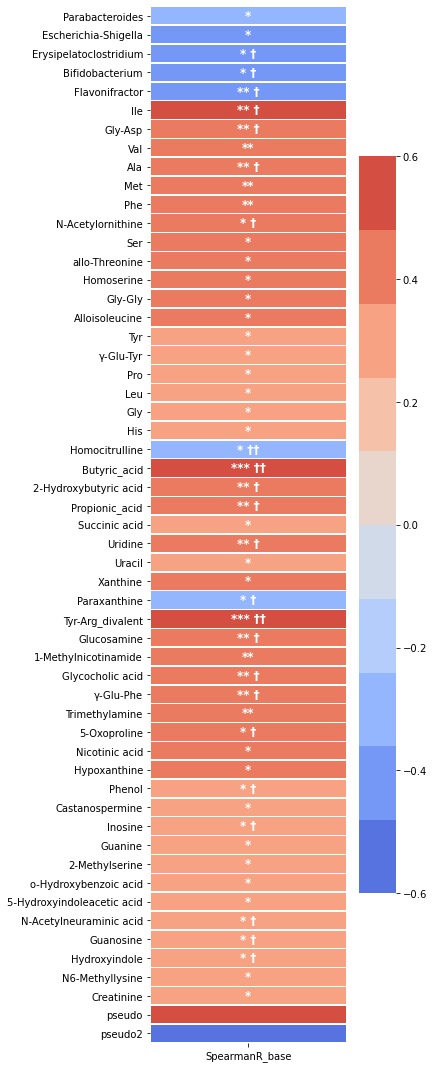

In [157]:
plt.figure(figsize=(6, 15))
sns.heatmap(
    df_responder_base[["SpearmanR_base"]],
    annot=False,
    cmap=sns.color_palette("coolwarm", 10),
    linewidth=.5
)

for i, ind in enumerate(df_responder_base.index):
    if ind == "pseudo" or ind == "pseudo2":
        continue
    p_corr = df_responder_base.loc[ind, "SpearmanP_base"]
    p_htest = df_responder_htest.loc[ind, "T_base"]
    
    if p_corr < 0.05 and p_corr >= 0.01:
        annotated = "*"
    if p_corr < 0.01 and p_corr >= 0.001:
        annotated = "**"
    if p_corr < 0.001:
        annotated = "***"

    if p_htest < 0.05 and p_htest >= 0.01:
        annotated += " †"
    if p_htest < 0.01 and p_htest >= 0.001:
        annotated += " ††"
    if p_htest < 0.001:
        annotated += " †††"

    plt.text(0.5, i+0.5, annotated, horizontalalignment="center", verticalalignment="center", color="white", weight="bold", size="large")

print(i)
plt.tight_layout()
plt.savefig("../data_output/responder/heat.base.v2.annotv2.pdf")

In [158]:
d = {
    "総コレステロール(mg/dL)": "Total cholesterol",
    "LDL-コレステロール(mg/dL)": "Low-density lipoprotein cholesterol",
    "Na(mEq/L)": "Natrium",
    "ヘマトクリット(%)": "Hematocrit"
}
df_responder_htest.rename(index=d, inplace=True)

23


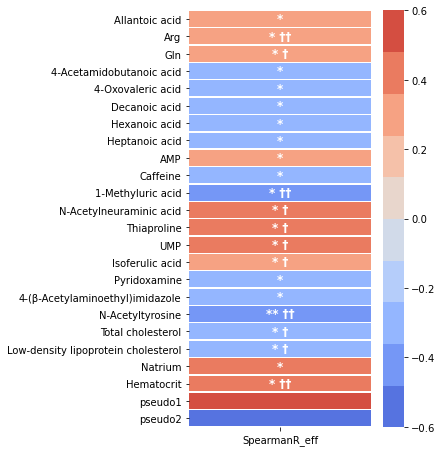

In [159]:
# 15*23/54
plt.figure(figsize=(6, 6.39))
sns.heatmap(
    df_responder_eff[["SpearmanR_eff"]],
    annot=False,
    cmap=sns.color_palette("coolwarm", 10),
    linewidth=.5
)

for i, ind in enumerate(df_responder_eff.index):
    if ind == "pseudo1" or ind == "pseudo2":
        continue
    p_corr = df_responder_eff.loc[ind, "SpearmanP_eff"]
    p_htest = df_responder_htest.loc[ind, "T_eff"]
    
    if p_corr < 0.05 and p_corr >= 0.01:
        annotated = "*"
    if p_corr < 0.01 and p_corr >= 0.001:
        annotated = "**"
    if p_corr < 0.001:
        annotated = "***"

    if p_htest < 0.05 and p_htest >= 0.01:
        annotated += " †"
    if p_htest < 0.01 and p_htest >= 0.001:
        annotated += " ††"
    if p_htest < 0.001:
        annotated += " †††"

    plt.text(0.5, i+0.5, annotated, horizontalalignment="center", verticalalignment="center", color="white", weight="bold", size="large")

print(i)
plt.tight_layout()
plt.savefig("../data_output/responder/heat.eff.v2.annotv2.pdf")

## 酪酸, プロピオン酸とIgA DiffのScatter

In [177]:
ge_diff = pd.read_csv("../data_input/ge.0.001.diff.tsv", sep="\t", index_col=0)
ra_diff = pd.read_csv("../data_input/ra.25.diff.tsv", sep="\t", index_col=0)
nm_diff = pd.read_csv("../data_input/nm.diff.tsv", sep="\t", index_col=0)
me_diff = pd.read_csv("../data_input/me.diff.tsv", sep="\t", index_col=0)
ge = pd.read_csv("../data_input/genus.0.001.tsv", sep="\t", index_col=0)
ra = pd.read_csv("../data_input/ra.25.tsv", sep="\t", index_col=0)
nm = pd.read_csv("../data_input/nm.tsv", sep="\t", index_col=0)
me = pd.read_csv("../data_input/me.tsv", sep="\t", index_col=0)

In [186]:
series_iga_diff = nm_diff.loc["IgA", me_diff.T.query("group == 'T'").index]
series_iga_diff.index = [index.split("_")[0] for index in series_iga_diff.index]

In [212]:
series_butyric_acid_0w = ra.loc["Butyric acid", me.T.query("group == 'T' and timepoint == '0w'").index]
series_tyr_arg_divalent_0w = ra.loc["Tyr-Arg_divalent", me.T.query("group == 'T' and timepoint == '0w'").index]

In [213]:
series_butyric_acid_0w.index = [ind.split("_")[1] for ind in series_butyric_acid_0w.index]
series_tyr_arg_divalent_0w.index = [ind.split("_")[1] for ind in series_tyr_arg_divalent_0w.index]

In [214]:
df_out = pd.DataFrame([series_iga_diff, series_butyric_acid_0w, series_tyr_arg_divalent_0w]).T

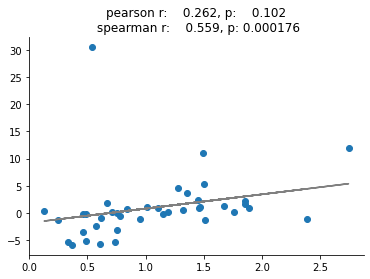

<Figure size 432x288 with 0 Axes>

In [219]:
scatter(df_out["Butyric acid"], df_out["IgA"])
plt.savefig("../data_output/responder/scatter.base.Butyrate_IgA.pdf")

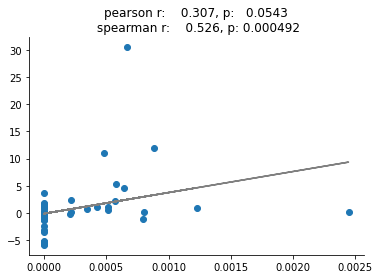

<Figure size 432x288 with 0 Axes>

In [221]:
scatter(df_out["Tyr-Arg_divalent"], df_out["IgA"])
plt.savefig("../data_output/responder/scatter.base.Tyr-Arg_divalent_IgA.pdf")